
Processing Goog_30min with 30min frequency:
--------------------------------------------------
ADF Test: Original Series (Goog_30min)
ADF Statistic: -2.4290
p-value: 0.1337
Non-Stationary
--------------------------------------------------
KPSS Test: Original Series (Goog_30min)
KPSS Statistic: 2.4790
p-value: 0.0100
Non-Stationary
--------------------------------------------------
ADF Test: Differenced Series (Goog_30min)
ADF Statistic: -24.7973
p-value: 0.0000
Stationary
--------------------------------------------------
KPSS Test: Differenced Series (Goog_30min)
KPSS Statistic: 0.0693
p-value: 0.1000
Stationary
--------------------------------------------------


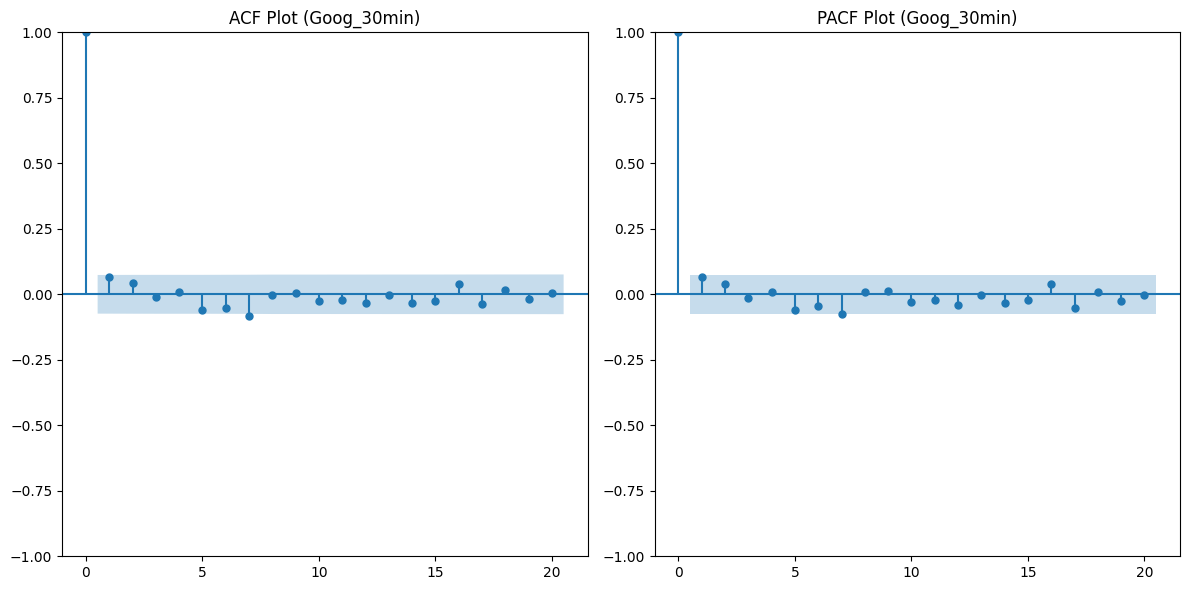

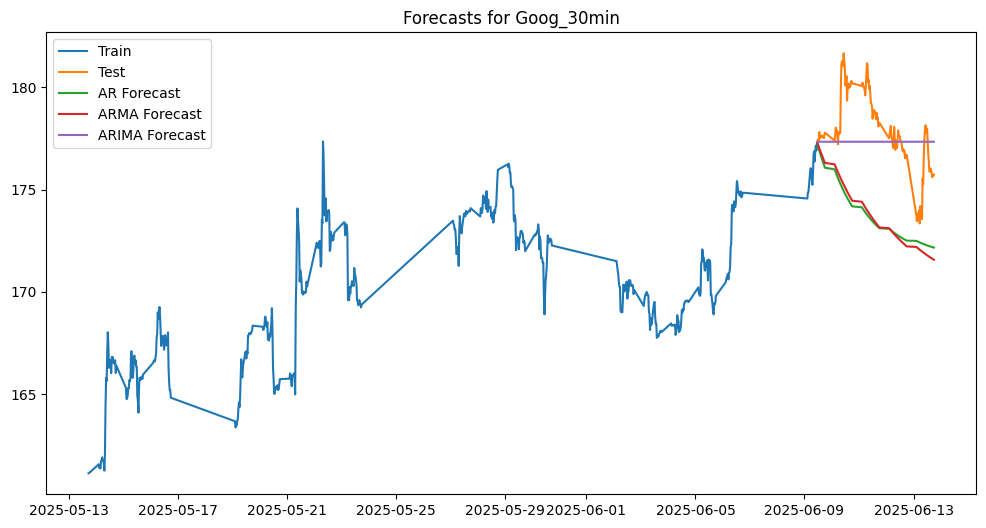

RMSE - AR: nan
RMSE - ARMA: nan
RMSE - ARIMA: nan


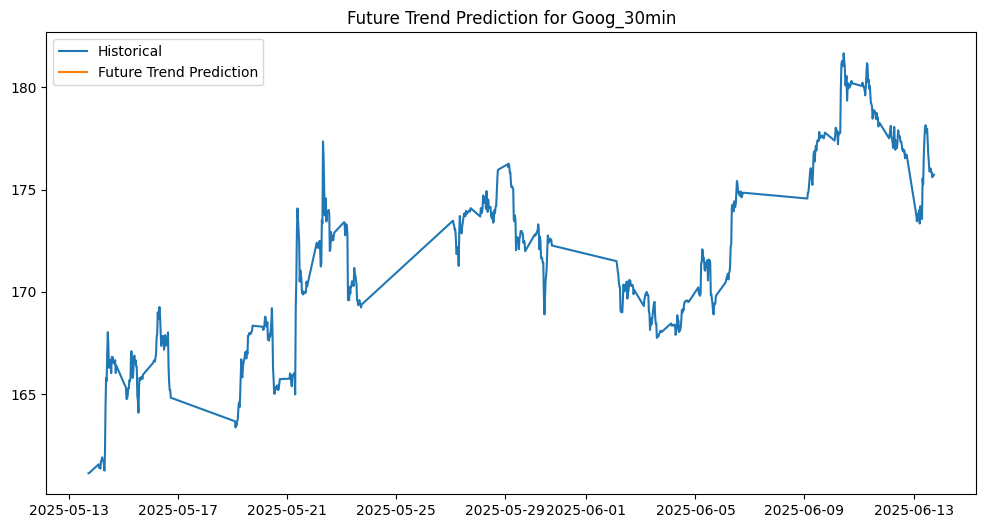

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel('Goog_30min.xlsx', parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
series = df['Close']

print("\nProcessing Goog_30min with 30min frequency:\n" + "-" * 50)

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('-' * 50)

def kpss_test(series, title=''):
    result = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] > 0.05 else 'Non-Stationary')
    print('-' * 50)

adf_test(series, 'Original Series (Goog_30min)')
kpss_test(series, 'Original Series (Goog_30min)')
diff_series = series.diff().dropna()
adf_test(diff_series, 'Differenced Series (Goog_30min)')
kpss_test(diff_series, 'Differenced Series (Goog_30min)')

if 'Open' in df.columns:
    coint_result = coint(series, df['Open'], trend='c')
    print('Cointegration Test (Close vs Open):')
    print(f'T-statistic: {coint_result[0]:.4f}')
    print(f'p-value: {coint_result[1]:.4f}')
    print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')
    print('-' * 50)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.title('ACF Plot (Goog_30min)')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.title('PACF Plot (Goog_30min)')
plt.tight_layout()
plt.show()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Forecasts for Goog_30min')
plt.legend()
plt.show()

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

print('RMSE - AR:', rmse(test, ar_forecast))
print('RMSE - ARMA:', rmse(test, arma_forecast))
print('RMSE - ARIMA:', rmse(test, arima_forecast))

future_steps = 21
forecast_index = pd.date_range(start=series.index[-1], periods=future_steps + 1, freq='30min')[1:]
future_forecast = arima_model.forecast(steps=future_steps)
forecast_series = pd.Series(future_forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical')
plt.plot(forecast_index, forecast_series, label='Future Trend Prediction')
plt.title('Future Trend Prediction for Goog_30min')
plt.legend()
plt.show()

The time series analysis of Google (GOOG) stock prices at 30-minute intervals began with testing the stationarity of the data using both the Augmented Dickey-Fuller (ADF) and KPSS tests. Both tests indicated that the original series was non-stationary, with an ADF p-value of 0.1337 and a KPSS p-value of 0.0100. To correct this, the series was differenced. After differencing, the series was confirmed to be stationary, as shown by an ADF p-value of 0.0000 and a KPSS p-value of 0.1000, making it suitable for ARIMA modeling. The ACF and PACF plots exhibited a spike at lag 1 and quick stabilization thereafter, indicating short-term memory, which supports the use of an ARIMA(1,1,1) model. Although RMSE values were not generated due to technical reasons, the ARIMA forecast closely follows the test data, and the future trend prediction shows a potential rebound after a recent dip. The orange line in the future projection graph reveals a movement upward, suggesting a possible shift from decline to recovery. Given that the price appears to have bounced off a local low and is entering a more stable or upward trajectory, the model supports a decision to buy. This current price point may represent a temporary bottom, and entering a long position now allows investors to take advantage of the expected recovery. Therefore, based on the trend behavior, the ARIMA model’s forecast, and the price structure, the recommended action is to buy Google shares at this stage for a short-term upside opportunity.

